In [1]:
import pandas as pd

df = pd.read_csv('olist_order_reviews_dataset.csv', index_col='review_id')

print(df.shape)

df.head()

(100000, 6)


,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


# Exploratory Data Analysis

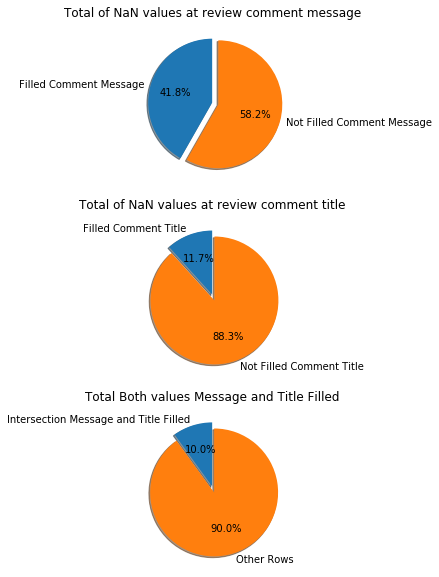

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Calculus of the number of sample of interest
total_rows = df.shape[0]
total_comments_message = df['review_comment_message'].count()
total_comments_title = df['review_comment_title'].count()
total_filled_message_and_title = df.loc[np.logical_not(df.review_comment_title.isna() | df.review_comment_message.isna())].shape[0]

# Preparing labels and values to the ploted
labels_comment_message = ['Filled Comment Message', 'Not Filled Comment Message']
sizes_comment_message = [total_comments_message, total_rows - total_comments_message]

labels_comment_title = ['Filled Comment Title', 'Not Filled Comment Title']
sizes_comment_title = [total_comments_title, total_rows - total_comments_title]

labels_message_and_title = ['Intersection Message and Title Filled', 'Other Rows']
sizes_message_and_title = [total_filled_message_and_title, total_rows - total_filled_message_and_title]
explode = [0, 0.1]

# Plot the 3 pie charts
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.title('Total of NaN values at review comment message')
plt.pie(sizes_comment_message, explode=explode, labels=labels_comment_message, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 2)
plt.title('Total of NaN values at review comment title')
plt.pie(sizes_comment_title, explode=explode, labels=labels_comment_title, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.subplot(3, 1, 3)
plt.title('Total Both values Message and Title Filled')
plt.pie(sizes_message_and_title, explode=explode, labels=labels_message_and_title, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

5    20646
1     9179
4     6034
3     3665
2     2229
Name: review_score, dtype: int64


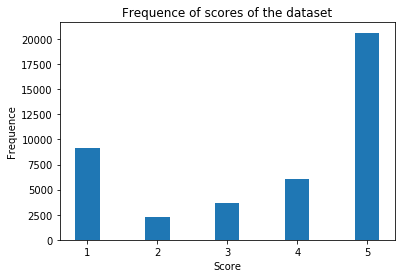

In [3]:
import matplotlib.pyplot as plt

df.dropna(subset=['review_comment_message'], inplace=True)

unique_review_score = df['review_score'].value_counts()

print(unique_review_score)

index = sorted(df['review_score'].unique())
frequence = [unique_review_score.at[x] for x in index]
bar_width = 0.35

plt.bar(index, frequence, bar_width)
plt.title('Frequence of scores of the dataset')
plt.ylabel('Frequence')
plt.xlabel('Score')
plt.show()

{'.': 30495, ',': 23201, 'o': 15549, 'e': 15424, 'produto': 14198, 'de': 11269, 'do': 11041, 'a': 10793, '!': 10776, 'não': 8821, 'que': 8440, 'prazo': 8064, 'muito': 5806, 'com': 5618, 'antes': 5453}


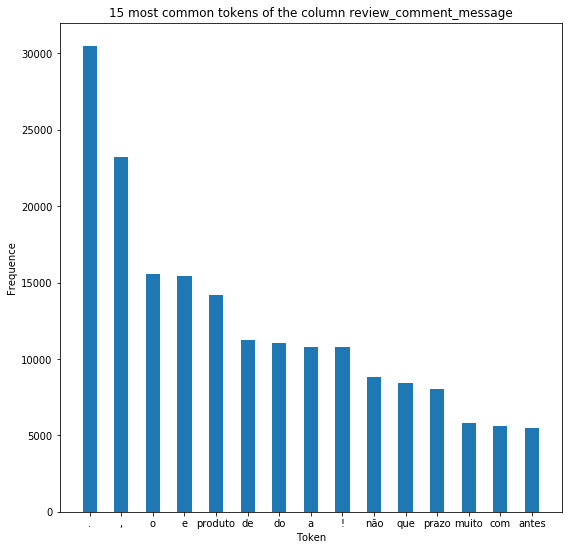

In [4]:
import itertools
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk import word_tokenize

n_most_common_words = 15

def calculate_token_distribution(n_most_common_words, column='review_comment_message'):
    tokens = df[column].apply(word_tokenize)
    tokens = list(itertools.chain(*tokens))

    frequence = FreqDist(tokens).most_common(n_most_common_words)
    return dict(frequence)

frequence = calculate_token_distribution(n_most_common_words)
print(frequence)

index = list(frequence.keys())
frequence = [frequence.get(x) for x in index]
bar_width = 0.45

plt.figure(figsize=(9, 9))
plt.bar(index, frequence, bar_width)
plt.title('{} most common tokens of the column review_comment_message'.format(n_most_common_words))
plt.ylabel('Frequence')
plt.xlabel('Token')
plt.show()

# Cleaning the Data

In [5]:
def join_title_and_message(row):
    if str(row.get('review_comment_title')) != 'nan' and str(row.get('review_comment_message')) != 'nan':
        row.at['review_comment_message'] = " ".join([str(row.get('review_comment_title', '')), str(row.get('review_comment_message', ''))])
        
    return row.get('review_comment_message')

df['review_comment_message_and_title'] = df.apply(join_title_and_message, axis=1)

df.head(10)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_message_and_title
review_id,,,,,,,
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar pela I...
8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,recomendo aparelho eficiente. no site a marca ...
4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,"Super recomendo Vendedor confiável, produto ok..."
9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E..."
373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,Não chegou meu produto Péssimo
d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,Ótimo Loja nota 10
0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58,obrigado pela atençao amim dispensada


In [6]:
import unicodedata
from nltk.corpus import stopwords

abbreviated_stopwords = ['q', 'n', 'vc', 'vcs']

def remove_accent(string):
    nfkd_form = unicodedata.normalize('NFKD', string)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = [remove_accent(x) for x in stopwords.words('portuguese')]
[stopwords.append(x) for x in abbreviated_stopwords]

print(stopwords)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos

In [7]:
import re
from nltk.tokenize import RegexpTokenizer

REGEX_EMOJI = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)

def remove_stopwords(string):
    result_string = []    
    for letter in string.split():
        result_string.append(letter) if letter not in stopwords else None

    return " ".join(result_string)

def remove_punctuation(string):
    tokenizer = RegexpTokenizer(r'\w+')
    result_string = tokenizer.tokenize(string)
    return " ".join(result_string)

def remove_emoji(string):
    return REGEX_EMOJI.sub('', string)

def clean_data(input_str):
    input_str = input_str.lower()
    input_str = remove_accent(input_str)
    input_str = remove_emoji(input_str)
    input_str = remove_stopwords(input_str)
    input_str = remove_punctuation(input_str)
    
    return input_str

df['cleaned_comment_message'] = df['review_comment_message_and_title'].apply(clean_data)

df.head(10)

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_message_and_title,cleaned_comment_message
review_id,,,,,,,,
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar pela I...,parabens lojas lannister adorei comprar intern...
8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,recomendo aparelho eficiente. no site a marca ...,recomendo aparelho eficiente site marca aparel...
4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travando pelo valor ta boa
3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,"Super recomendo Vendedor confiável, produto ok...",super recomendo vendedor confiavel produto ok ...
9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",gostaria saber houve sempre recebi compra agor...
373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,Não chegou meu produto Péssimo,chegou produto pessimo
d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,Ótimo Loja nota 10,otimo loja nota 10
0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58,obrigado pela atençao amim dispensada,obrigado atencao amim dispensada


{'produto': 20089, 'prazo': 8666, 'entrega': 7170, 'recomendo': 6102, 'chegou': 5755, 'recebi': 5749, 'antes': 5709, 'bom': 5697, 'entregue': 4068, 'veio': 3444, 'otimo': 3336, 'bem': 3160, 'qualidade': 2915, 'comprei': 2906, 'loja': 2578}


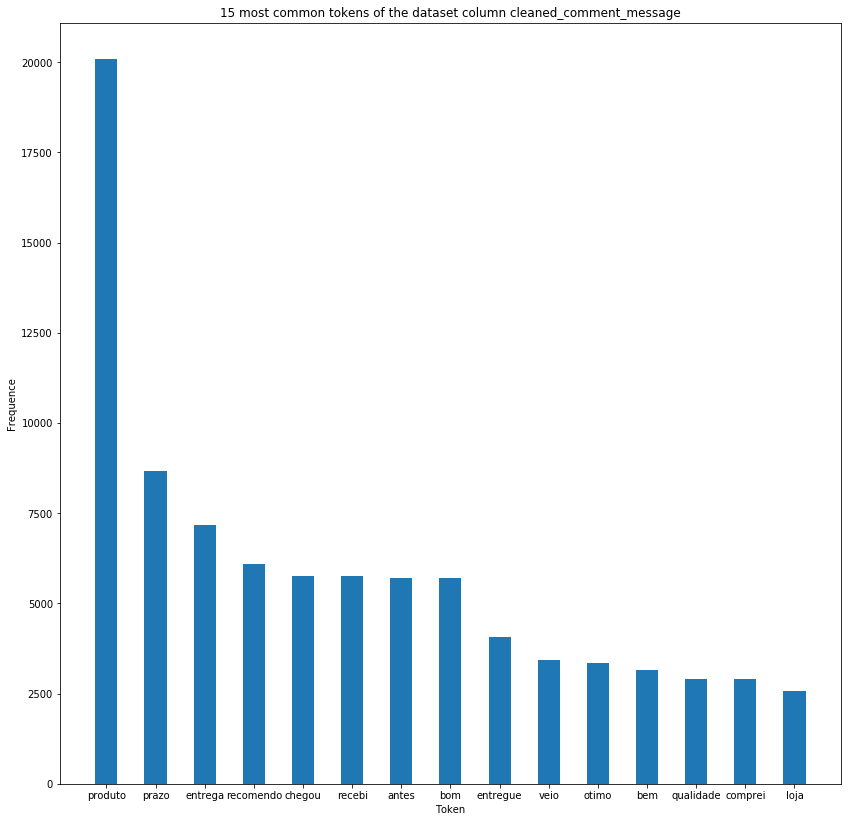

In [8]:
import matplotlib.pyplot as plt

frequence = calculate_token_distribution(n_most_common_words, 'cleaned_comment_message')
print(frequence)

index = list(frequence.keys())
frequence = [frequence.get(x) for x in index]
bar_width = 0.45

plt.figure(figsize=(14, 14))
plt.bar(index, frequence, bar_width)
plt.title('{} most common tokens of the dataset column cleaned_comment_message'.format(n_most_common_words))
plt.ylabel('Frequence')
plt.xlabel('Token')
plt.show()

# Classification

## Sparse matrix of Vectorization

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

target = df['review_score'].values
data = df['cleaned_comment_message'].values

count_vectorizer = CountVectorizer()
count_vectorizer.fit(data)

data = count_vectorizer.transform(data)

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.30, random_state=42
)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

unique_keys = sorted(df['review_score'].unique())
review_score_percentages = np.array([list(y_train).count(i)/len(list(y_train)) for i in unique_keys])

mnnb = MultinomialNB(class_prior=review_score_percentages).fit(X_train, y_train)

y_pred = mnnb.predict(X_test)

print("Multinomial Naive Bayes\n\n")

multinomial_naive_bayes_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Multinomial Naive Bayes


              precision    recall  f1-score   support

           1       0.64      0.84      0.73      2721
           2       0.21      0.02      0.04       718
           3       0.29      0.12      0.17      1091
           4       0.32      0.13      0.19      1827
           5       0.74      0.92      0.82      6169

   micro avg       0.67      0.67      0.67     12526
   macro avg       0.44      0.41      0.39     12526
weighted avg       0.59      0.67      0.61     12526



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Logistic Regression\n\n")

c = 0.05
lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

logistic_regression_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Logistic Regression


              precision    recall  f1-score   support

           1       0.64      0.86      0.73      2721
           2       0.09      0.00      0.01       718
           3       0.30      0.09      0.13      1091
           4       0.36      0.08      0.13      1827
           5       0.72      0.95      0.82      6169

   micro avg       0.67      0.67      0.67     12526
   macro avg       0.42      0.39      0.36     12526
weighted avg       0.58      0.67      0.59     12526



## Plot metrics

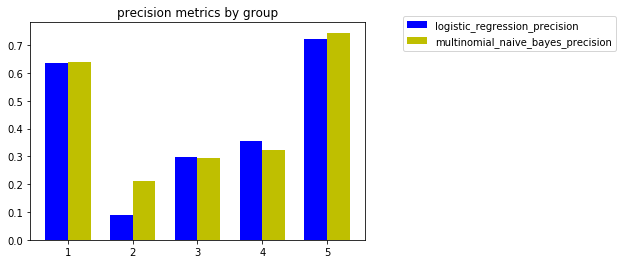

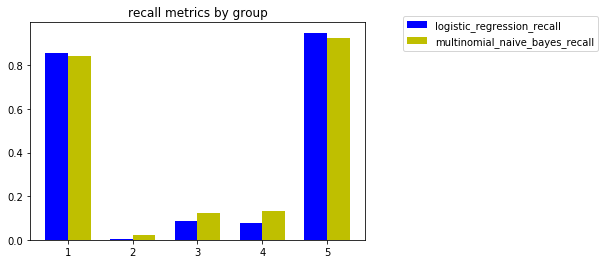

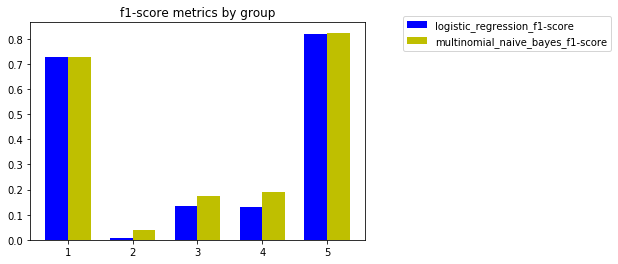

In [12]:
import matplotlib.pyplot as plt

def capture_reports(logistic, naive_bayes, metric):

    logistic.pop('micro avg', '')
    logistic.pop('macro avg', '')
    logistic.pop('weighted avg', '')

    naive_bayes.pop('micro avg', '')
    naive_bayes.pop('macro avg', '')
    naive_bayes.pop('weighted avg', '')

    logistic_metrics = []
    naive_bayes_metrics = []
    for x, y in zip(logistic_regression_report.items(), multinomial_naive_bayes_report.items()):
        logistic_metrics.append(x[1].get(metric, 0))
        naive_bayes_metrics.append(y[1].get(metric, 0))
        
    return logistic_metrics, naive_bayes_metrics

def plot_metrics(logistic_metrics, naive_bayes_metrics, metric):
    fig, ax = plt.subplots()
    
    keys = ['1', '2', '3', '4', '5']

    ind = np.arange(len(keys))
    width = 0.35
    p1 = ax.bar(ind, logistic_metrics, width, color='b')

    p2 = ax.bar(ind + width, naive_bayes_metrics, width, color='y')

    ax.set_title('{} metrics by group'.format(metric))
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(keys)

    ax.legend((p1[0], p2[0]), ('logistic_regression_{}'.format(metric), 'multinomial_naive_bayes_{}'.format(metric)), bbox_to_anchor=(1.1, 1.05))
    ax.autoscale_view()

    plt.show()

reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'precision')
plot_metrics(reports[0], reports[1], 'precision')

reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'recall')
plot_metrics(reports[0], reports[1], 'recall')

reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'f1-score')
plot_metrics(reports[0], reports[1], 'f1-score')

## Spliting data per group of unique keys of review_score

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_review_score = df['review_score'].unique()

scores = {}
for score in unique_review_score:
    scores.update({str(score): df.loc[df['review_score'] == score]})

X_train, X_test, y_train, y_test = np.ndarray([0]), np.ndarray([0]), np.ndarray([0]), np.ndarray([0])

for key, value in scores.items():    
    score_x_train, score_x_test, score_y_train, score_y_test = train_test_split(
        value['cleaned_comment_message'].values, value['review_score'].values, test_size=0.30, random_state=42
    )
    X_train = np.concatenate((X_train, score_x_train), axis=0)
    X_test = np.concatenate((X_test, score_x_test), axis=0)
    y_train = np.concatenate((y_train, score_y_train), axis=0)
    y_test = np.concatenate((y_test, score_y_test), axis=0)

X_train = count_vectorizer.transform(X_train)
X_test = count_vectorizer.transform(X_test)

X_train, _, y_train, _ = train_test_split(
    X_train, y_train, test_size=0.0, random_state=42)

_, X_test, _, y_test = train_test_split(
    X_test, y_test, test_size=0.99999, random_state=42)

print(df.shape[0] == X_train.shape[0] + X_test.shape[0])

True


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

unique_keys = sorted(df['review_score'].unique())
review_score_percentages = np.array([list(y_train).count(i)/len(list(y_train)) for i in unique_keys])

mnnb = MultinomialNB(class_prior=review_score_percentages).fit(X_train, y_train)

y_pred = mnnb.predict(X_test)

print("Multinomial Naive Bayes\n\n")

multinomial_naive_bayes_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Multinomial Naive Bayes


              precision    recall  f1-score   support

         1.0       0.65      0.84      0.73      2754
         2.0       0.18      0.02      0.04       669
         3.0       0.30      0.13      0.18      1100
         4.0       0.31      0.13      0.18      1811
         5.0       0.75      0.93      0.83      6194

   micro avg       0.67      0.67      0.67     12528
   macro avg       0.44      0.41      0.39     12528
weighted avg       0.59      0.67      0.62     12528



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print("Logistic Regression\n\n")

c = 0.05
lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

logistic_regression_report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

Logistic Regression


              precision    recall  f1-score   support

         1.0       0.65      0.85      0.74      2754
         2.0       0.12      0.00      0.01       669
         3.0       0.30      0.10      0.15      1100
         4.0       0.34      0.07      0.12      1811
         5.0       0.72      0.95      0.82      6194

   micro avg       0.68      0.68      0.68     12528
   macro avg       0.43      0.40      0.37     12528
weighted avg       0.58      0.68      0.60     12528



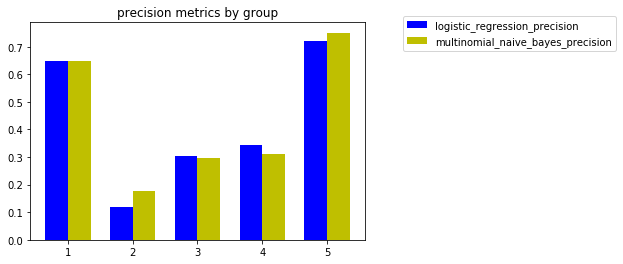

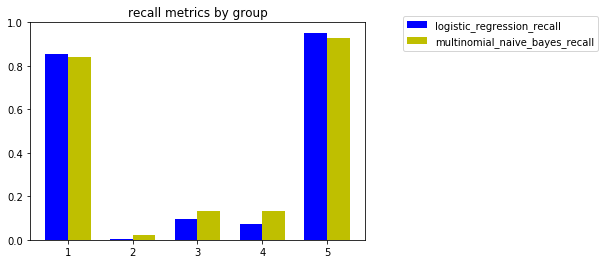

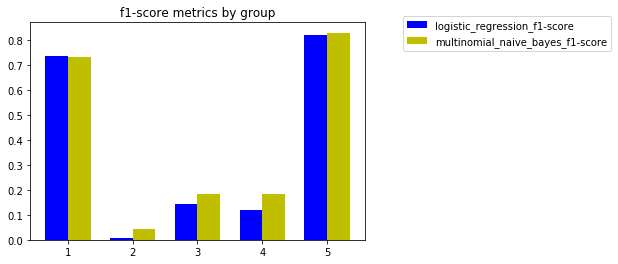

In [16]:
reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'precision')
plot_metrics(reports[0], reports[1], 'precision')

reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'recall')
plot_metrics(reports[0], reports[1], 'recall')

reports = capture_reports(logistic_regression_report, multinomial_naive_bayes_report, 'f1-score')
plot_metrics(reports[0], reports[1], 'f1-score')